# Project 5b - Population Dynamics: the Zombie apocalypse

The same ideas associated with modelling hare and lynx can be easily extended to other situations.  Here, we will model a classic zombie apocalypse.  The rules of the situation are simple:
- There are three groups: humans, hungry zombies, and fed zombies.
- The simulation should start with 100 humans, 0 hungry zombies, and 1 fed zombie
- fed zombies scratch humans, turning them into fed zombies.  This occurs in 0.008 zombie-human interactions
- fed zombies turn into hungry zombies at a rate of 0.15 (zombies per zombie) per unit time
- hungry zombies eat human brains, which removes the human from the population, but does not turn them into zombies.  They are less effective than fed zombies, so this only occurs in 0.003 of zombie-human interactions
- If a hungry zombie successfully feeds, they become a fed zombie
- hungry zombies die at a rate of 0.3 (zombies per zombie) per unit time.  

### Model development
**First, write down a system of ODEs that model this situation.  There should be a term on the right hand side corresponding to many of the above rules.  Of particular note: most rules lead to a reduction in one population and a commensurate increase in another population.  Make sure such terms appear (with opposite signs) for both populations.**

h = humans = 100, s = starved zombies = 0, f = fed zombies = 1

humans -> fed zombies $\alpha = 0.008$ \
fed zombies -> hungry zombies $\omega = 0.15$ \
hungry zombies -(remove human)-> fed zombies $\gamma = 0.003$ \
hungry zombies -> removed zombie $\phi = 0.3$


$\frac{dh}{dt} = -(\alpha * h * f)-(\gamma*h*s)$

$\frac{ds}{dt} = -(\gamma*s*h)-(\phi*s)+(\omega*f)$

$\frac{df}{dt} = +(\alpha*h*f)+(\gamma*h*s)-(\omega*f)$

### Model implementation
**Implement the above model.  If it is implemented correctly, all interesting dynamics should proceed within 50 time units (are they days, hours?  I'll leave that to you to conceptualize).  Again, a second order Runge-Kutta method works fine here.**


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class iZombie:
    def __init__(self, alpha, omega, gamma, phi):
        self.alpha = alpha
        self.omega = omega
        self.gamma = gamma
        self.phi = phi

    def rhs(self, t, u):
        humans = u[0]
        starved = u[1]
        fed = u[2]

        dhdt = -(self.alpha * humans * fed) - (self.gamma * humans * starved)
        dsdt = -(self.alpha * humans * starved) - (self.phi * starved) + (self.omega * fed)
        dfdt = (self.alpha * humans * fed) + (self.gamma * humans * starved) - (self.omega * fed)
        return np.array([dhdt, dsdt, dfdt])


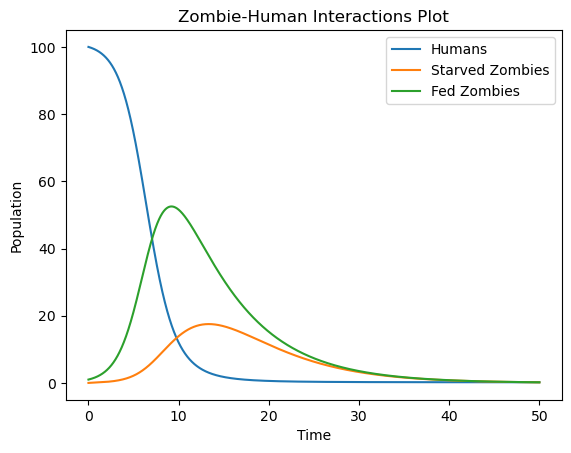

In [10]:
import ode_methods as om

# Initial conditions
# 0 - humans
# 1 - starved
# 2 - fed
u0 = np.array([100.0, 0.0, 1.0])

# Time interval
t_interval = np.array([0.0, 50.0])
dt = 0.001

# Create the model
model = iZombie(alpha=0.008, omega=0.15, gamma=0.003, phi=0.3)
method = om.RungeKutta4()
integrator = om.Integrator(ode=model, method=method)

# Integrate the model
t, u = integrator.integrate(u_0=np.array(u0), interval=t_interval, dt=dt)

# Plot the results
plt.plot(t, u[:, 0], label='Humans')
plt.plot(t, u[:, 1], label='Starved Zombies')
plt.plot(t, u[:, 2], label='Fed Zombies')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Zombie-Human Interactions Plot')
plt.legend()
plt.show()